In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
!ls ../data/cleaned

2016-2021_fieldgoals_stats.csv
2016-2021_fumbles_stats.csv
2016-2021_interceptions_stats.csv
2016-2021_passing_stats.csv
2016-2021_receiving_stats.csv
2016-2021_rushing_stats.csv
2016-2021_tackling_stats.csv
all_superbowl_winning_rosters.csv
all_superbowl_winning_rosters_wconference.csv


### Purpose of notebook: Investigate trends per position for superbowl winning teams across the decades

In [9]:
sb_rosters = pd.read_csv('../data/cleaned/all_superbowl_winning_rosters.csv')
sb_rosters.head()

,year,team,no.,player,age,position,games_played,games_started,weight,height,...,date_of_birth,years_in_league,approx_value,drafted_(tm/rnd/pick/yr),player_additional,salary,drafted_team/undrafted,drafted_round,drafted_pick,drafted_year
0,2022,kansas,73.0,Nick Allegretti,26.0,G,17,3.0,310.0,6-4,...,1996-04-21,3,3.0,Kansas City Chiefs / 7th / 216th pick / 2019,AlleNi00,NaN,Kansas City Chiefs,7th,216th pick,2019
1,2022,kansas,32.0,Ugo Amadi,25.0,S,1,0.0,201.0,5-9,...,1997-05-16,3,0.0,Seattle Seahawks / 4th / 132nd pick / 2019,AmadUg00,NaN,Seattle Seahawks,4th,132nd pick,2019
2,2022,kansas,19.0,Matt Ammendola,26.0,K,2,0.0,195.0,5-9,...,1996-12-11,1,0.0,Undrafted,AmmeMa00,NaN,Undrafted,NaN,NaN,NaN
3,2022,kansas,39.0,Zayne Anderson,25.0,DB,3,0.0,206.0,6-2,...,1997-01-03,1,0.0,Undrafted,AndeZa02,NaN,Undrafted,NaN,NaN,NaN
4,2022,kansas,81.0,Blake Bell,31.0,TE,3,1.0,252.0,6-6,...,1991-08-07,7,0.0,San Francisco 49ers / 4th / 117th pick / 2015,BellBl00,NaN,San Francisco 49ers,4th,117th pick,2015


In [19]:
# Adding decade column

sb_rosters['year'] = sb_rosters['year'].astype(str)
sb_rosters['decade'] = sb_rosters['year'].str[:3] + '0s'

In [78]:
# Creating positional groupings for lighter visualisation.

positional_groups = {'offensive_line':['LT', 'T', 'LG', 'G', 'C', 'RG', 'RT', 'ROT'], 'receiver':['WR', 'TE','SE', 'FL'],
                    'running_backs':['RB', 'HB', 'TB', 'FB', 'LH,' 'RH', 'BB' 'B', 'WB'], 'special_teamers':[ 'LS', 'K', 'P', 'PR', 'KR', 'RET'],
                    'defensive_line':['DL', 'E', 'LE', 'RE', 'LDE', 'DE', 'LDT', 'DT', 'NT', 'MG' , 'DG', 'RDT', 'RDE'], 
                    'linebacker':['LOLB', 'RUSH', 'OLB', 'LLB', 'WILL', 'ILB', 'SLB', 'MLB', 'WLB', 'RILB', 'ROLB', 'SAM', 'LB'],
                    'defensive_backs':['LCB', 'CB', 'RCB', 'SS', 'FS', 'LDH', 'RDH', 'S', 'RS', 'DB'],
                    'Quarterback':['QB']}

def get_position(row):
    for position, positions_list in positional_groups.items():
        if any(pos in row['position'] for pos in positions_list):
            return position
    return None

sb_rosters['positional_group'] = sb_rosters.apply(get_position, axis=1)


In [79]:
grouped_position = sb_rosters.groupby(['decade', 'position']).agg({'age':'mean', 'years_in_league':'mean', 'player':'count'}).reset_index()
grouped_position.head()

,decade,position,age,years_in_league,player
0,1960s,C,25.571429,3.000000,7
1,1960s,DB,25.272727,1.454545,11
2,1960s,DE,25.000000,0.600000,5
3,1960s,DT,24.000000,1.400000,5
4,1960s,E,34.500000,12.500000,2


In [80]:
grouped_positional_group = sb_rosters.groupby(['decade', 'positional_group']).agg({'age':'mean', 'years_in_league':'mean', }).reset_index()
grouped_positional_group

,decade,positional_group,age,years_in_league
0,1960s,Quarterback,31.000000,8.727273
1,1960s,defensive_backs,26.500000,2.900000
2,1960s,defensive_line,27.823529,4.764706
3,1960s,linebacker,25.428571,3.190476
4,1960s,offensive_line,26.904762,4.238095
5,1960s,receiver,27.153846,4.307692
6,1960s,running_backs,26.130435,3.565217
7,1960s,special_teamers,30.000000,6.833333
8,1970s,Quarterback,29.086957,6.173913
9,1970s,defensive_backs,25.313725,2.843137


offensive_line 0.724963151207353
running_backs 0.49230922899517005
Quarterback 0.6779809147687641
receiver 0.6580409340526113
defensive_backs 0.7674181516698506
linebacker 0.9054076968096816
defensive_line 0.5146001962147494
special_teamers 0.9313939027614634


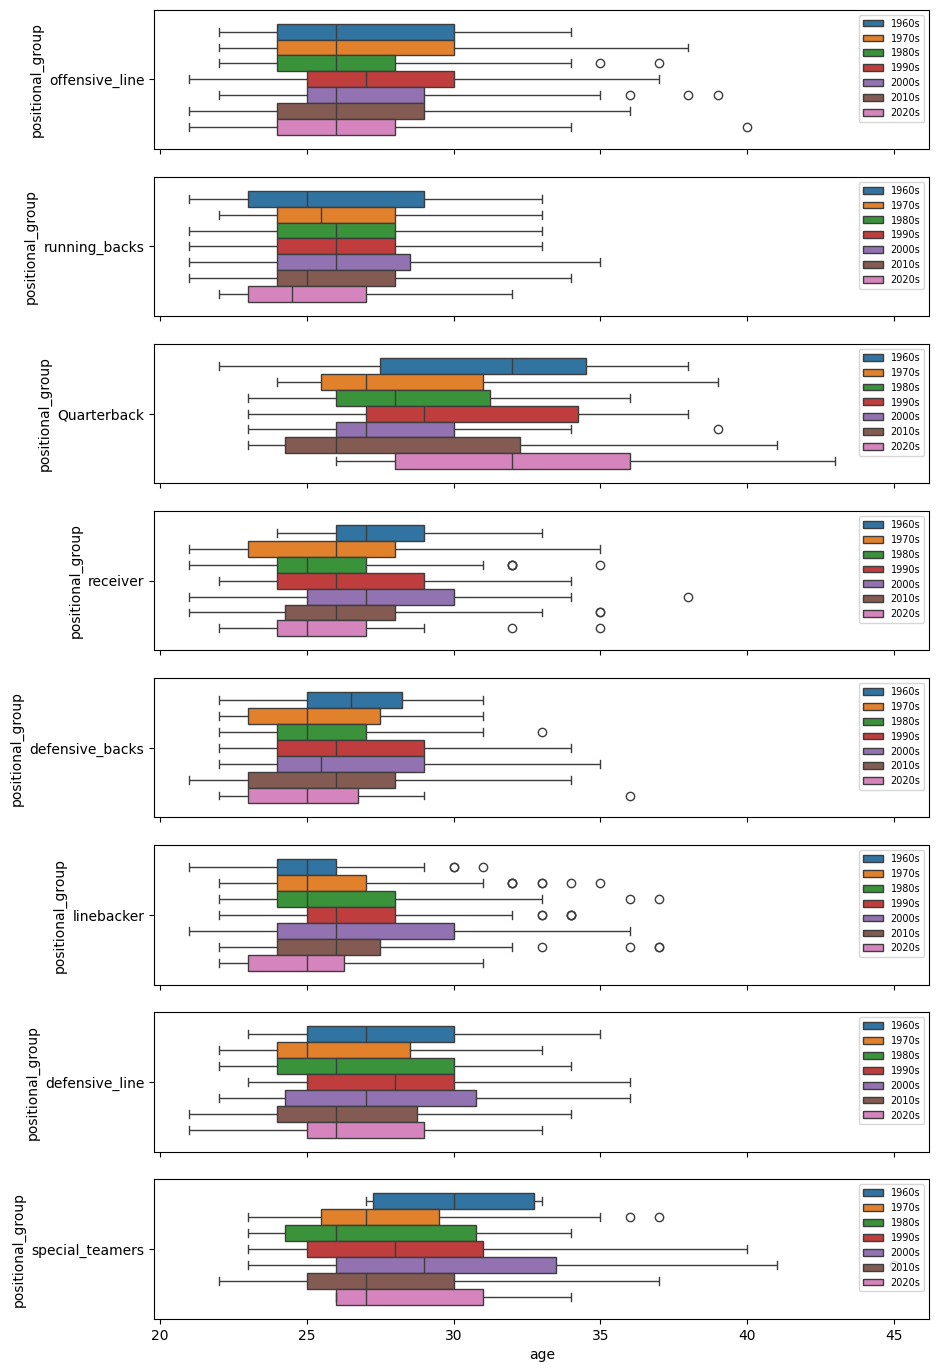

In [102]:
groupings = ['offensive_line','running_backs', 'Quarterback', 'receiver','defensive_backs', 'linebacker',  'defensive_line', 'special_teamers']
decade_order = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

fig, ax = plt.subplots(len(groupings), 1, figsize=(10, 17), sharex=True)
i = 0
#plt.xlim(sb_rosters['age'].min(), sb_rosters['age'].max())
for group in groupings:
    data = sb_rosters.loc[sb_rosters['positional_group'] == group]
    sns.boxplot(data=data, x='age', y='positional_group', hue='decade', hue_order=decade_order , ax=ax[i]
               ).legend(fontsize=7, loc='upper right')
    print(group, data['age'].skew())
    i += 1
plt.show()

### Conclusion to EDA on Age per position trends
When looking at the players on super bowl winning rosters throughout the decades, the trends per age indicate whether the player is in or near their prime. 

#### Defensive players
Defensive linemen particularly haven't changed too much in terms of age and tend to be around 25 and 28 when they are on super bowl winning rosters. 
Linebackers' age ranges have centered around 24-28, likely because they do similar jobs to defensive linemen but veer a little on the younger side due to the more athletic demands of the position, relative to linemen. 
Defensive backs are only slightly younger with their lower age range and actually have higher upper ranges relative to linebackers which was surprising. This might be due to the lesser physical nature of the position compared to linebacker, while maintaining similar heights and other stature measures. 

### Offensive players
Offensive linemen and quarterbacks have tended to be the oldest on the field throughout the years when winning superbowls, suggesting that there is a certain pedigree and number of years in the NFL required in order to be put in a best position for winning. 

Receivers looked to have become decreasingly younger, suggesting the game has shifted to a more receiver-dependent playing style, which can be supported by the fact that passing became more frequent in recent decades. The shorter IQRs of receivers ages' also indicate the shorter 'superbowl winning prime' ages for receivers, linebackers and running backs. 


### Investigation into 'years_in_league'

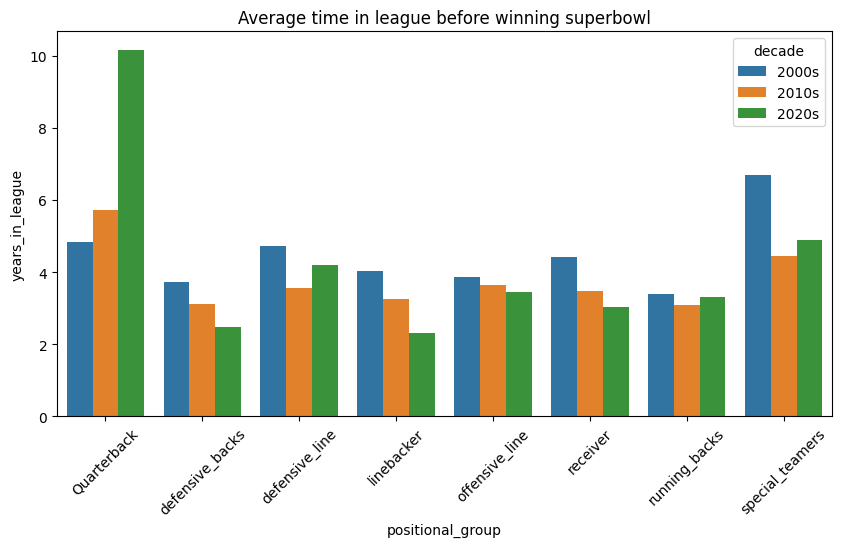

In [130]:
# Looking at the average time in league when winning a championship per positional group.

grouped_positional_years = sb_rosters.groupby(['decade', 'positional_group']).agg({'years_in_league':'mean'}).reset_index()
#grouped_positional_years

plt.subplots(figsize=(10,5))

g = sns.barplot(data=grouped_positional_years.loc[grouped_positional_years['decade'].isin(
    ['2000s', '2010s', '2020s'])], x='positional_group', y='years_in_league', 
            hue='decade')
g.set_title('Average time in league when winning a superbowl')
plt.xticks(rotation=45)
plt.show()

In [111]:
# filtering df to only include player's first super bowl based on player name. 
first_super_bowl = sb_rosters.drop_duplicates(subset='player', keep='first')
first_super_bowl_pos_grouped = first_super_bowl.groupby(['decade', 'positional_group']).agg({'years_in_league':'mean'}).reset_index()

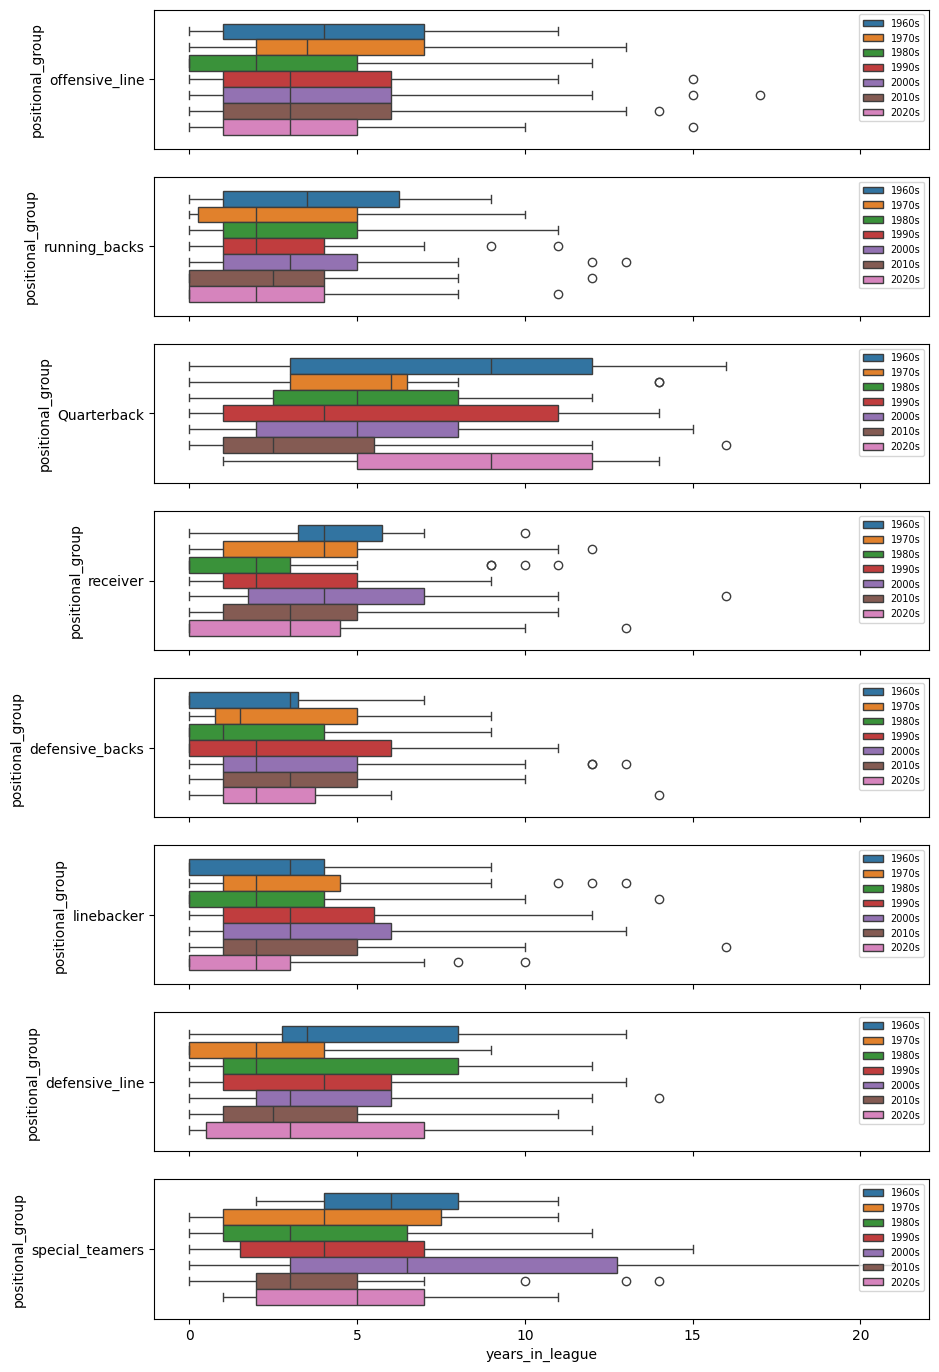

In [119]:
groupings = ['offensive_line','running_backs', 'Quarterback', 'receiver','defensive_backs', 'linebacker',  'defensive_line', 'special_teamers']
decade_order = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

fig, ax = plt.subplots(len(groupings), 1, figsize=(10, 17), sharex=True)
i = 0
#plt.xlim(sb_rosters['age'].min(), sb_rosters['age'].max())
for group in groupings:
    data = first_super_bowl.loc[first_super_bowl['positional_group'] == group]
    sns.boxplot(data=data, x='years_in_league', y='positional_group', hue='decade', hue_order=decade_order , ax=ax[i]
               ).legend(fontsize=7, loc='upper right')
    #for decade in decade_order:
    #    print(group, data.loc[data['decade'] == decade ]['years_in_league'].skew())
    i += 1
plt.show()

### Conclusion: Years in league before first super bowl

When looking at the average number of years in the nfl before a player typically finds themselves on a super bowl winning roster, one can see there is a general downward trend in the average number of years in the league across the last three decades, all apart from quarterbacks which has seen somewhat of a steady increase. This further supports the previous claim that quarterbacks with more years in the league has a higher likelihood to lead a team to a superbowl. 

Another insight of interest is that the typical rookie contract is around 3 years, which coincides with the general average time in league when winning a championship. This can suggest multiple assumptions.

- Teams draft/sign young players with the intent that they will win a championship by the last year of that player's contract. These 3 year contracts typically apply to players who have been drafted in the first 4 rounds of the draft.
- Players who finish their rookie contract (assuming 2-3 years) will sign a new contract and win relatively soon after signing that new contract. Teams therefore might be looking for players who are finishing their rookie contract to bring those into their organisation to boost their chances of winning.

What this would mean for a general manager or team looking to build a super-bowl calibre team: 

- If you are looking to win within the next 3 years, the players you sign in the next year are the most significant. Look to sign a quarterback who has already been in the league for 2-3 years and shows potential to grow further.
- If you are looking to win a superbowl in the next year, be confident the players you have in your team for at least the last 2 years are the some of the best in their position across the whole league. The chances of winning super bowls with those players will decrease after the next 2 years. 
- This increases the worth of quarterbacks who have been in the league for 4+ years and are still playing at a high level, as their chances of winning a super bowl remain strong until they've been in the league for about 8-9 years, provided they remain healthy. 

